In [1]:
# Manage data and statistics
import numpy as np
from numpy.random import default_rng, SeedSequence
import pandas as pd
from pandas.api.types import CategoricalDtype

from scipy import stats
import scipy.linalg as la
from scipy.stats.mstats import winsorize

# Plot data
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
mpl.style.use('tableau-colorblind10')

import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")

# scikit-learn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Read `Auto` dataset

In [2]:
auto = pd.read_csv('https://raw.githubusercontent.com/cbrownley/2022MLWEEK_MLWITHPYTHON/main/data/Auto.csv')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Check data types and values

In [5]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [6]:
# SOURCE: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#evaluation-order-matters

auto = auto.copy()

auto['horsepower'] = auto.loc[:, 'horsepower'].replace('?', np.nan)

auto = auto.dropna()

auto['horsepower'] = auto.loc[:, 'horsepower'].astype('int')

auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [8]:
auto.describe().round(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.0,392.0,392.0,392.0,392.0,392.0,392.0,392.0
mean,23.4,5.5,194.4,104.5,2977.6,15.5,76.0,1.6
std,7.8,1.7,104.6,38.5,849.4,2.8,3.7,0.8
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0,1.0
25%,17.0,4.0,105.0,75.0,2225.2,13.8,73.0,1.0
50%,22.8,4.0,151.0,93.5,2803.5,15.5,76.0,1.0
75%,29.0,8.0,275.8,126.0,3614.8,17.0,79.0,2.0
max,46.6,8.0,455.0,230.0,5140.0,24.8,82.0,3.0


## Relationship between `Horsepower` and `MPG`

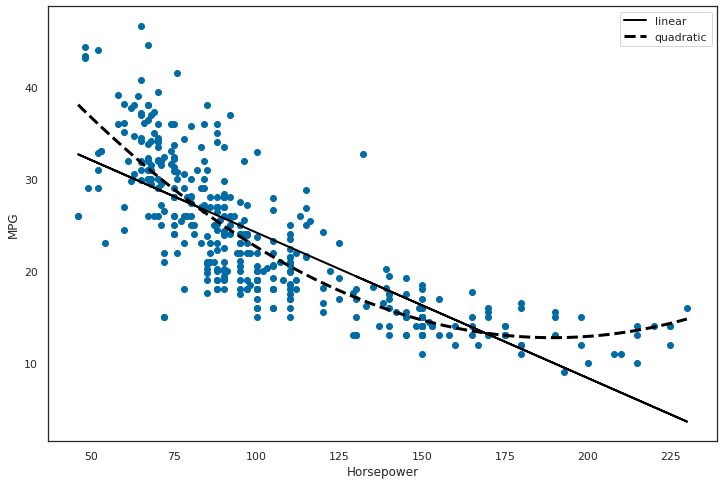

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

m1 = stats.linregress(auto.horsepower, auto.mpg)
m2 = np.poly1d(np.polyfit(auto.horsepower, auto.mpg, 2))
m2line = np.linspace(auto.horsepower.min(), auto.horsepower.max(), 100)

ax.scatter(auto.horsepower, auto.mpg)
plt.plot(auto.horsepower, m1.intercept + m1.slope*auto.horsepower, 'k-', linewidth=2, label='linear')
plt.plot(m2line, m2(m2line), 'k--', linewidth=3, label='quadratic')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.legend();

In [10]:
poly = PolynomialFeatures(1, include_bias=True)
X = poly.fit_transform(auto['horsepower'].to_frame())
X[:10]

array([[  1., 130.],
       [  1., 165.],
       [  1., 150.],
       [  1., 150.],
       [  1., 140.],
       [  1., 198.],
       [  1., 220.],
       [  1., 215.],
       [  1., 225.],
       [  1., 190.]])

In [11]:
poly = PolynomialFeatures(2, include_bias=True)
X = poly.fit_transform(auto['horsepower'].to_frame())
X[:10]

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       [1.0000e+00, 1.4000e+02, 1.9600e+04],
       [1.0000e+00, 1.9800e+02, 3.9204e+04],
       [1.0000e+00, 2.2000e+02, 4.8400e+04],
       [1.0000e+00, 2.1500e+02, 4.6225e+04],
       [1.0000e+00, 2.2500e+02, 5.0625e+04],
       [1.0000e+00, 1.9000e+02, 3.6100e+04]])

In [12]:
poly = PolynomialFeatures(3, include_bias=True)
X = poly.fit_transform(auto['horsepower'].to_frame())
X[:10]

array([[1.0000000e+00, 1.3000000e+02, 1.6900000e+04, 2.1970000e+06],
       [1.0000000e+00, 1.6500000e+02, 2.7225000e+04, 4.4921250e+06],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06],
       [1.0000000e+00, 1.4000000e+02, 1.9600000e+04, 2.7440000e+06],
       [1.0000000e+00, 1.9800000e+02, 3.9204000e+04, 7.7623920e+06],
       [1.0000000e+00, 2.2000000e+02, 4.8400000e+04, 1.0648000e+07],
       [1.0000000e+00, 2.1500000e+02, 4.6225000e+04, 9.9383750e+06],
       [1.0000000e+00, 2.2500000e+02, 5.0625000e+04, 1.1390625e+07],
       [1.0000000e+00, 1.9000000e+02, 3.6100000e+04, 6.8590000e+06]])

## Why Validation?

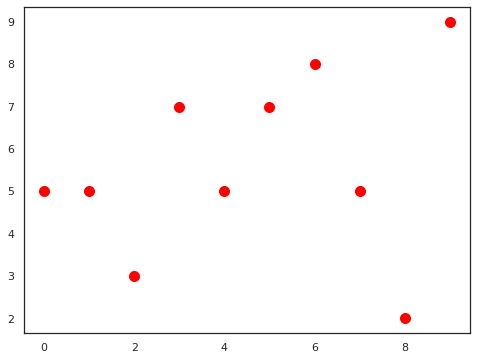

In [13]:
# SOURCE: https://personal.math.ubc.ca/~pwalls/math-python/linear-algebra/applications/

N = 10

x = np.arange(0, N)

y = np.random.randint(0, 10, N)

plt.figure(figsize=(8,6))
plt.plot(x, y, 'ro', markersize=10);

In [14]:
X = np.column_stack([x**k for k in range(0, N)])

print(X[:5,:5])

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


In [15]:
a = la.solve(X, y)

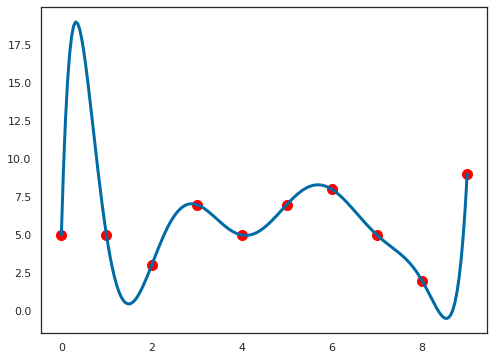

In [16]:
xs = np.linspace(0, N-1, 200)

ys = sum([a[k]*xs**k for k in range(0, N)])

plt.figure(figsize=(8,6))
plt.plot(x, y, 'ro', xs, ys, markersize=10, linewidth=3);

In [17]:
lr = LinearRegression()

lr.fit(X, y)

preds = lr.predict(X)

in_sample_mse = mean_squared_error(y, preds)

print("""We can perfectly interpolate 10 points with a degree-9 polynomial.  The in-sample MSE is: {}!  
However, notice how unstable the curve is.  Instead, we want to evaluate the model based on its out-of-sample predictive performance.""".format( round(in_sample_mse, 2) ))

We can perfectly interpolate 10 points with a degree-9 polynomial.  The in-sample MSE is: 0.0!  
However, notice how unstable the curve is.  Instead, we want to evaluate the model based on its out-of-sample predictive performance.


## The Validation Set Approach

In [27]:
X_train, X_test, y_train, y_test = train_test_split(auto['horsepower'], auto['mpg'], test_size=0.5)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196,), (196,), (196,), (196,))

In [28]:
train = auto[['horsepower', 'mpg']].sample(n=196)

test  = auto.loc[~auto.index.isin(train.index), ['horsepower', 'mpg']]

train.shape, test.shape

((196, 2), (196, 2))

In [33]:
# SOURCE: Introduction to Statistical Learning, 2nd Edition Figure 5.2

# 1 train test split
scores = []
for power in range(1,11):
    poly = PolynomialFeatures(power, include_bias=False)
    X_train = poly.fit_transform(train['horsepower'].to_frame())
    X_test  = poly.fit_transform( test['horsepower'].to_frame())
    lr = LinearRegression(fit_intercept=True)
    lr.fit(X_train, train['mpg'].values)
    preds = lr.predict(X_test)
    score = mean_squared_error(test['mpg'].values, preds)
    scores.append(score)

In [34]:
# 10 train test splits
repeats = {}
for idx in range(10):
    train = auto[['horsepower', 'mpg']].sample(n=196)
    test  = auto.loc[~auto.index.isin(train.index), ['horsepower', 'mpg']]
    scores = []
    for power in range(1,11):
        poly = PolynomialFeatures(power, include_bias=False)
        X_train = poly.fit_transform(train['horsepower'].to_frame())
        X_test  = poly.fit_transform( test['horsepower'].to_frame())
        lr = LinearRegression(fit_intercept=True)
        lr.fit(X_train, train['mpg'].values)
        preds = lr.predict(X_test)
        score = mean_squared_error(test['mpg'].values, preds)
        scores.append(score)
    repeats[idx] = scores

The validation set approach was used on the `Auto` data set in order to estimate the test error that results from predicting `mpg` using polynomial functions of `horsepower`.  Left: Validation error estimates for a single split into training and validation data sets.  Right: The validation method was repeated ten times, each time using a different random split of the observations into a training set and validation set.  This illustrates the variability in the estimated test MSE that results from this approach.

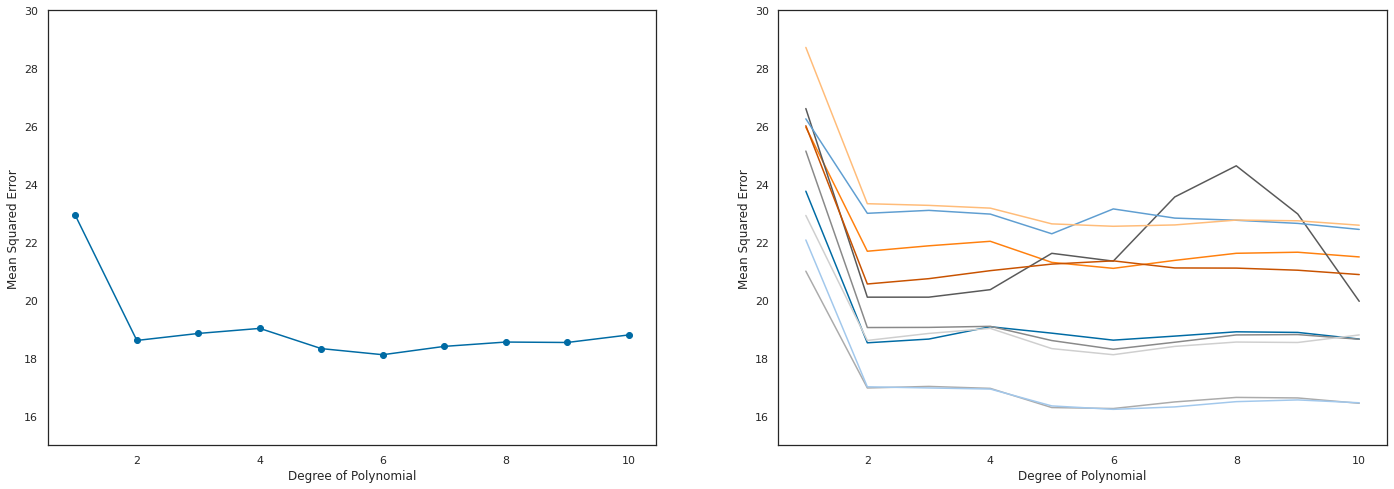

In [37]:
# SOURCE: Introduction to Statistical Learning, 2nd Edition Figure 5.2

fig, ax = plt.subplots(1, 2, figsize=(24,8))

ax[0].plot(range(1,11), scores)
ax[0].scatter(range(1,11), scores)
ax[0].set(ylim=(15,30))
ax[0].set_xlabel('Degree of Polynomial')
ax[0].set_ylabel('Mean Squared Error')

for idx in range(10):
    ax[1].plot(range(1,11), repeats[idx])
ax[1].set(ylim=(15,30))
ax[1].set_xlabel('Degree of Polynomial')
ax[1].set_ylabel('Mean Squared Error');

# Exercise

## 1a. Create a scatterplot with `displacement` on the x-axis and `mpg` on the y-axis
## 1b. Use `train_test_split` to create train (70%) and test (30%) datasets
## 1c. Regress `mpg` on `displacement` and calculate the `MSE` and `R-squared` values for the train and test datasets
## 1d. Use `PolynomialFeatures` to create and fit a quadratic regression and calculate the `MSE` and `R-squared` values for the train and test datasets

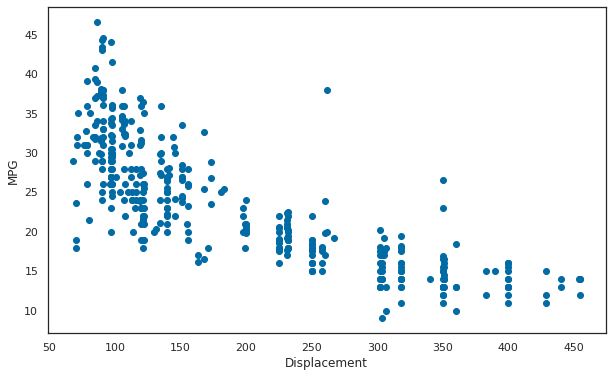

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(auto.displacement, auto.mpg)
ax.set_xlabel('Displacement')
ax.set_ylabel('MPG');

In [46]:
from sklearn.model_selection import train_test_split

X = auto['displacement'].values.reshape(-1,1)
y = auto['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [47]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.475, test: 23.652
R^2 train: 0.660, test: 0.616


In [54]:
from sklearn.preprocessing import PolynomialFeatures

pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad_train = quadratic.fit_transform(X_train)
X_quad_test  = quadratic.fit_transform(X_test)

In [55]:
X_fit = np.arange(X.min(), X.max(), 10)[:, np.newaxis]

# fit quadratic features
pr.fit(X_quad_train, y_train)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

In [56]:
y_train_pred = pr.predict(X_quad_train)
y_test_pred  = pr.predict(X_quad_test)

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 17.661, test: 21.960
R^2 train: 0.707, test: 0.643


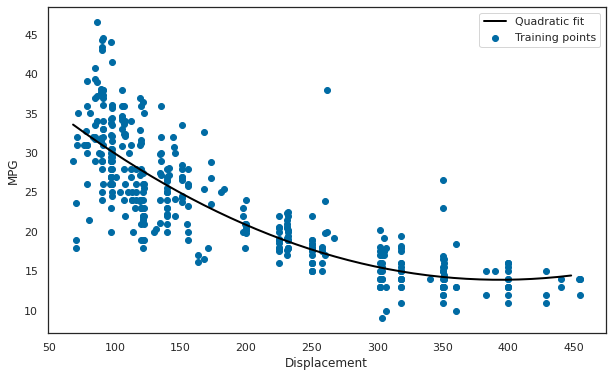

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_quad_fit, 'k-', linewidth=2, label='Quadratic fit')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.legend(loc='upper right');

## Leave-One-Out (LOOCV) and K-fold Cross-Validation

In [23]:
loo_scores = []
n = len(auto)
for power in range(1,11):
    poly = PolynomialFeatures(power, include_bias=False)
    X = poly.fit_transform(auto['horsepower'].to_frame())
    y = auto['mpg']
    lr = LinearRegression()
    loo_scores.append(abs(cross_val_score(lr, X, y, cv = n, scoring = 'neg_mean_squared_error').mean()))

In [24]:
# loo_scores = list(map(abs, loo_scores))
loo_scores

[24.231513517929226,
 19.24821312448967,
 19.33498406402931,
 19.42443031024277,
 19.03321248615882,
 18.97863406819667,
 19.129480449254846,
 19.224150660848743,
 19.133322843461364,
 18.93976572079586]

In [25]:
kfold_list = []
for _ in range(9):
    scores = []
    n = len(auto)
    for power in range(1,11):
        poly = PolynomialFeatures(power, include_bias=False)
        X = poly.fit_transform(auto['horsepower'].to_frame())
        y = auto['mpg']
        X, y = shuffle(X, y)
        lr = LinearRegression()
        scores.append(cross_val_score(lr, X, y, cv = 10, scoring = 'neg_mean_squared_error').mean())
    kfold_list.append(list(map(abs, scores)))

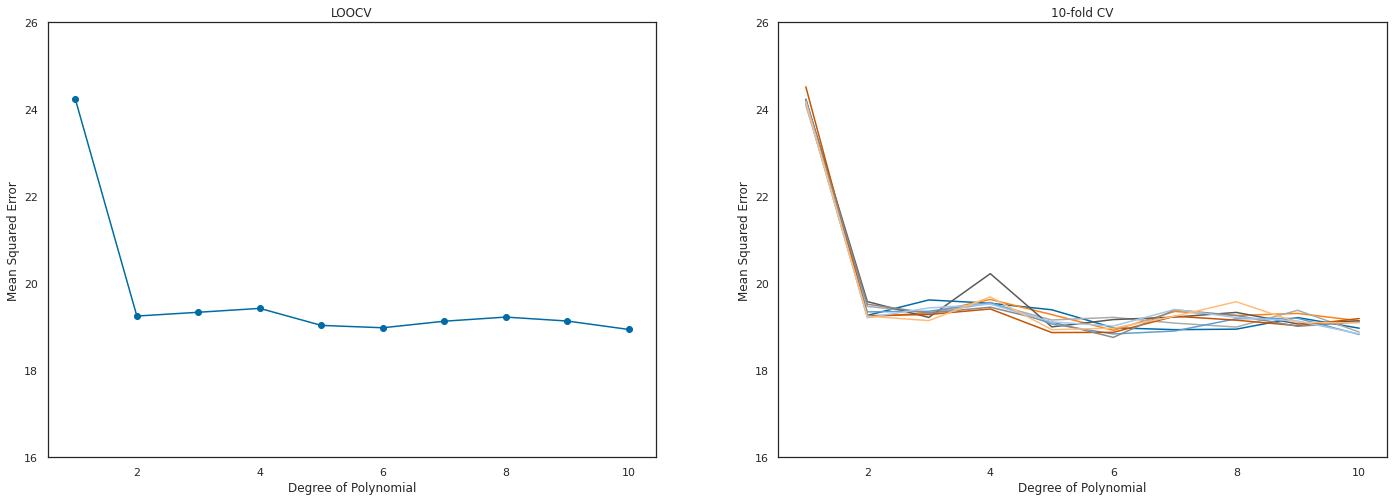

In [26]:
# SOURCE: Introduction to Statistical Learning, 2nd Edition Figure 5.4

fig, ax = plt.subplots(1, 2, figsize=(24,8))

degree = list(range(1,11))

ax[0].plot(degree, loo_scores)
ax[0].scatter(degree, loo_scores)
ax[0].set(ylim=(16,26))
ax[0].set_xlabel('Degree of Polynomial')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('LOOCV')

for idx in range(9):
    ax[1].plot(list(range(1,11)), kfold_list[idx])
ax[1].set(ylim=(16,26))
ax[1].set_xlabel('Degree of Polynomial')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('10-fold CV');

# Exercise

## 1a. Use `PolynomialFeatures` to create and fit a quadratic regression and use `cross_val_score` to calculate the `LOOCV` `MSE` and `R-squared` values

In [87]:
n = len(auto)

poly = PolynomialFeatures(2, include_bias=False)
X = poly.fit_transform(auto['displacement'].to_frame())
y = auto['mpg']

lr = LinearRegression(fit_intercept=True)

In [88]:
scores = np.array([abs(score) for score in cross_val_score(lr, X, y, cv = n, scoring = 'neg_mean_squared_error', n_jobs=-1)])

print('LOOCV MSE: %0.2f (std: %0.2f)' % (scores.mean(), scores.std()))

LOOCV MSE: 19.15 (std: 39.66)


In [89]:
scores = np.array([abs(score) for score in cross_val_score(lr, X, y, cv = 10, scoring = 'r2', n_jobs=-1)])

print('10-fold CV R-squared: %0.2f (std: %0.2f)' % (scores.mean(), scores.std()))

10-fold CV R-squared: 0.55 (std: 0.18)


In [90]:
lr.fit(X, y)
y_train_pred = lr.predict(X)

print('MSE train: %.3f' % (mean_squared_error(y, y_train_pred)))
print('R^2 train: %.3f' % (r2_score(y, y_train_pred)))

MSE train: 18.909
R^2 train: 0.689
